<a href="https://colab.research.google.com/github/hsn31/Clustering/blob/main/TP_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP Clustering

**2020-2021 
5 SDBD A2**



---



Le but de ces TP est mettre en oeuvre et de comparer différents algorithmes de clustering tout d’abord à partir de quelques méthodes fournies par scikitlearn puis en utilisant une méthode externe :


*   k-Means
*   clustering hiérarchique (agglomératif)
*   DBSCAN
*   HDBSCAN


Nous utilisons des jeux de données "artificiels" en seulement 2 dimensions pour des raisons pédagogiques. En effet, en visualisant ces exemples, il est souvent assez évident de déterminer le bon nombre
de clusters à obtenir

# 1 Jeux de données

In [1]:
import sklearn
from scipy.io import arff

Importation des fichiers 

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:
import os
os.chdir("/content/gdrive/My Drive/5SDBD/clustering-benchmark-master")
!ls

 consensus   nb-configuration.xml   README-old.asc	   updreadme.rb
 dataset     pom.xml		    run
 evolve-sc  'putain de tp.ipynb'    src
 hdbscan     README.md		   'TP Clustering.ipynb'


In [4]:
test= os.chdir("/content/gdrive/My Drive/5SDBD/clustering-benchmark-master/src/main/resources/datasets/artificial")
!ls

2d-10c.arff	       disk-3000n.arff	     simplex.arff
2d-20c-no0.arff        disk-4000n.arff	     sizes1.arff
2d-3c-no123.arff       disk-4500n.arff	     sizes2.arff
2d-4c.arff	       disk-4600n.arff	     sizes3.arff
2d-4c-no4.arff	       disk-5000n.arff	     sizes4.arff
2d-4c-no9.arff	       disk-6000n.arff	     sizes5.arff
2dnormals.arff	       donut1.arff	     smile1.arff
2sp2glob.arff	       donut2.arff	     smile2.arff
3MC.arff	       donut3.arff	     smile3.arff
3-spiral.arff	       donutcurves.arff      spherical_4_3.arff
aggregation.arff       dpb.arff		     spherical_5_2.arff
aml28.arff	       dpc.arff		     spherical_6_2.arff
atom.arff	       ds2c2sc13.arff	     spiral.arff
banana.arff	       ds3c3sc6.arff	     spiralsquare.arff
birch-rg1.arff	       ds4c2sc8.arff	     square1.arff
birch-rg2.arff	       DS-577.arff	     square2.arff
birch-rg3.arff	       DS-850.arff	     square3.arff
blobs.arff	       elliptical_10_2.arff  square4.arff
cassini.arff	       elly-2d10c13s.arff   

In [64]:
data = arff.loadarff(open('/content/gdrive/My Drive/5SDBD/clustering-benchmark-master/src/main/resources/datasets/artificial/xclara.arff','r'))[0]
data1 = arff.loadarff(open('/content/gdrive/My Drive/5SDBD/clustering-benchmark-master/src/main/resources/datasets/artificial/2d-10c.arff','r'))[0]
data2 = arff.loadarff(open('/content/gdrive/My Drive/5SDBD/clustering-benchmark-master/src/main/resources/datasets/artificial/s-set4.arff','r'))[0]
data3 = arff.loadarff(open('/content/gdrive/My Drive/5SDBD/clustering-benchmark-master/src/main/resources/datasets/artificial/dartboard1.arff','r'))[0]
data4 = arff.loadarff(open('/content/gdrive/My Drive/5SDBD/clustering-benchmark-master/src/main/resources/datasets/artificial/2sp2glob.arff','r'))[0]
disk3000n = arff.loadarff(open('/content/gdrive/My Drive/5SDBD/clustering-benchmark-master/src/main/resources/datasets/artificial/disk-3000n.arff','r'))[0]
engytime = arff.loadarff(open('/content/gdrive/My Drive/5SDBD/clustering-benchmark-master/src/main/resources/datasets/artificial/engytime.arff','r'))[0]
clutot48k = arff.loadarff(open('/content/gdrive/My Drive/5SDBD/clustering-benchmark-master/src/main/resources/datasets/artificial/cluto-t4-8k.arff','r'))[0]
d31 = arff.loadarff(open('/content/gdrive/My Drive/5SDBD/clustering-benchmark-master/src/main/resources/datasets/artificial/D31.arff','r'))[0]
zelnik = arff.loadarff(open('/content/gdrive/My Drive/5SDBD/clustering-benchmark-master/src/main/resources/datasets/artificial/zelnik3.arff','r'))[0]

In [65]:
#print(data)

In [58]:
nb_clusters = 4
data = data3

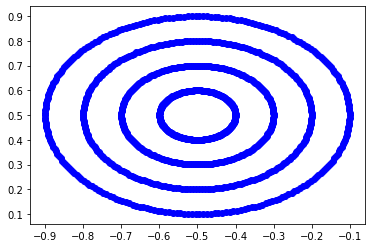

In [59]:
import matplotlib.pyplot as plt
import numpy as np

for i in data:
  plt.scatter(i[0], i[1], color='b');

# 2 Clustering k-Means

## 2.1 Interêts de la méthode


In [9]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
import time

In [10]:
#Transformer les datas en list 

In [11]:
def returnData(data):
  X = np.zeros((data.size,2))
  i = 0
  for d in data:
    X[i] = [d[0], d[1]]
    i = i +1
  return X

X = returnData(data)
print(X)

[[  2.072345  -3.241693]
 [ 17.93671   15.78481 ]
 [  1.083576   7.319176]
 ...
 [ 64.46532  -10.50136 ]
 [ 90.72282  -12.25584 ]
 [ 64.87976  -24.87731 ]]


In [12]:
#init='k-means++'
#kmeans = KMeans(n_clusters=init)
#kmeans.fit(X)

kmeans_data=returnData(data)
kmeans = KMeans(n_clusters=nb_clusters, random_state=0, init='k-means++').fit(kmeans_data)
print(kmeans)
labels = kmeans.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)


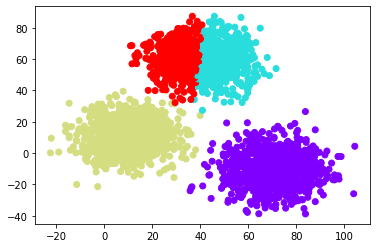

In [13]:
plt.scatter(kmeans_data[:,0],kmeans_data[:,1], c=labels, cmap='rainbow')

On considère maintenant qu’il peut être possible de déterminer "automatiquement" le bon nombre de clusters. Identifiez pour cela dans la documentation de scikitlearn les métriques qui vous semblent pertinentes

- Silhouette coefficient
- Calinski-Harabasz Index
- Davies-Bouldin Index

On peut utiliser uniquement les métriques n'ayant pas besoin de "vrai label"


In [14]:
import numpy as np
import matplotlib.pyplot as plt

plot0 = []
exec0 =[]

plot1 = []
exec1 =[]

plot2 = []
exec2 =[]

-  Silhouette coefficient


{'k': 2, 'silhouette score': 0.542435069970526, 'execution time': 0.0339207649230957}
{'k': 3, 'silhouette score': 0.6945587736089913, 'execution time': 0.02866816520690918}
{'k': 4, 'silhouette score': 0.5409711653329833, 'execution time': 0.07099413871765137}
{'k': 5, 'silhouette score': 0.4100704118378745, 'execution time': 0.0683126449584961}
{'k': 6, 'silhouette score': 0.3105817604300826, 'execution time': 0.08555150032043457}
{'k': 7, 'silhouette score': 0.32055728220683294, 'execution time': 0.1092214584350586}
{'k': 8, 'silhouette score': 0.33168575518093324, 'execution time': 0.12074661254882812}
{'k': 9, 'silhouette score': 0.3412131655306691, 'execution time': 0.13193845748901367}
{'k': 10, 'silhouette score': 0.33561837584939264, 'execution time': 0.15323638916015625}


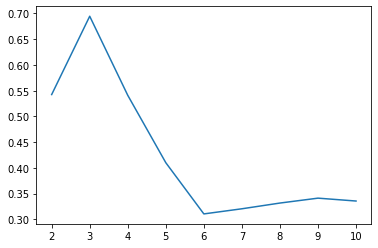

In [15]:
res = []
k=[]
for i in range (2,11):
  start_time = time.time()
  kmeans = KMeans(n_clusters=i, random_state=0, init='k-means++').fit(kmeans_data)
  end_time = time.time()
  time_final0  = end_time - start_time
  labels = kmeans.labels_
  met0 = metrics.silhouette_score(kmeans_data, labels, metric='euclidean')
  Dict = dict({'k': i, 'silhouette score': met0, 'execution time': time_final0})
  res.append(Dict)
  k.append(i)

  plot0.append(met0)
  exec0.append(time_final0)
print(*res, sep = "\n")

plt.plot(k, plot0)

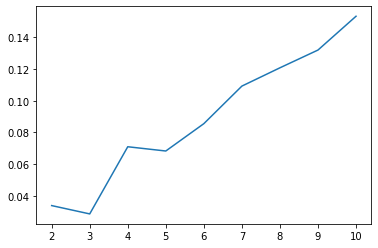

In [16]:
 plt.plot(k, exec0 ,label="Silhouette")

- Calinski-Harabasz Index


{'k': 2, 'Calinski Harabasz score': 3530.715935988991, 'execution time': 0.033740997314453125}
{'k': 3, 'Calinski Harabasz score': 10826.600579461165, 'execution time': 0.02956867218017578}
{'k': 4, 'Calinski Harabasz score': 8382.335153907985, 'execution time': 0.058539390563964844}
{'k': 5, 'Calinski Harabasz score': 7266.835445816175, 'execution time': 0.06628918647766113}
{'k': 6, 'Calinski Harabasz score': 6787.707732946798, 'execution time': 0.08506298065185547}
{'k': 7, 'Calinski Harabasz score': 6497.241561919068, 'execution time': 0.10742497444152832}
{'k': 8, 'Calinski Harabasz score': 6470.570823214944, 'execution time': 0.1223287582397461}
{'k': 9, 'Calinski Harabasz score': 6548.682981513098, 'execution time': 0.13115501403808594}
{'k': 10, 'Calinski Harabasz score': 6295.897066875034, 'execution time': 0.1479027271270752}


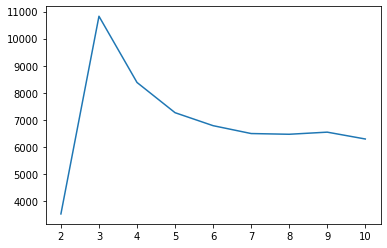

In [17]:
res = []
for i in range (2,11):
  start_time = time.time()
  kmeans = KMeans(n_clusters=i, random_state=0, init='k-means++').fit(kmeans_data)
  end_time = time.time()
  time_final1  = end_time - start_time
  labels = kmeans.labels_
  met1 = metrics.calinski_harabasz_score(kmeans_data, labels)
  
  Dict = dict({'k': i, 'Calinski Harabasz score': met1, 'execution time': time_final1})
  res.append(Dict)

  plot1.append(met1)
  exec1.append(time_final1)

print(*res, sep = "\n")
plt.plot(k, plot1 ,label="Calinski Harabasz")


- Davies-Bouldin Index 

{'k': 2, 'Davies Bouldin score': 0.6777307283608246, 'execution time': 0.03469657897949219}
{'k': 3, 'Davies Bouldin score': 0.42056158508478453, 'execution time': 0.027524471282958984}
{'k': 4, 'Davies Bouldin score': 0.8190632935327737, 'execution time': 0.05766725540161133}
{'k': 5, 'Davies Bouldin score': 1.0860974514674064, 'execution time': 0.06820964813232422}
{'k': 6, 'Davies Bouldin score': 1.2387054465419558, 'execution time': 0.08960962295532227}
{'k': 7, 'Davies Bouldin score': 1.1100100909514357, 'execution time': 0.10670328140258789}
{'k': 8, 'Davies Bouldin score': 0.9966075445691914, 'execution time': 0.11961770057678223}
{'k': 9, 'Davies Bouldin score': 0.9202675263207174, 'execution time': 0.134413480758667}
{'k': 10, 'Davies Bouldin score': 0.9258144248214062, 'execution time': 0.17244768142700195}


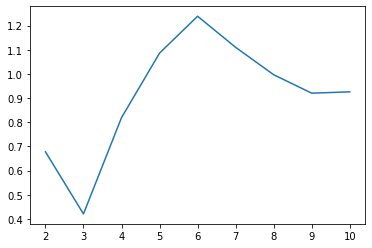

In [18]:
res = []
for i in range (2,11):
  start_time = time.time()
  kmeans = KMeans(n_clusters=i, random_state=0, init='k-means++').fit(kmeans_data)
  end_time = time.time()
  time_final2  = end_time - start_time
  labels = kmeans.labels_
  met2 = davies_bouldin_score(kmeans_data, labels)
  Dict = dict({'k': i, 'Davies Bouldin score': met2, 'execution time': time_final2})
  res.append(Dict)

  plot2.append(met2)
  exec2.append(time_final2)

print(*res, sep = "\n")

plt.plot(k, plot2 ,label="Davies Bouldin")

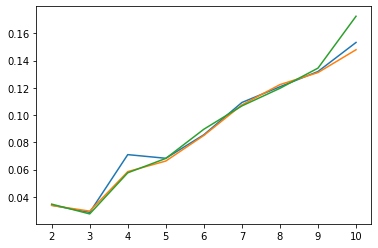

In [19]:
plt.plot(k, exec0 ,label="Silhouette")
plt.plot(k, exec1 ,label="Calinski Harabasz")
plt.plot(k, exec2 ,label="Davies Bouldin")

plt.show()

## 2.2 Limites clustering K-means


* Test sur s-set4.arff => On s'attends à ne rien avoir
* Test sur dartboard1.artff => Il n'arrive pas à obtenir le bon résultat
* Test sur 2sp2glob.artff => Il fonctionne sur les taches mais pas sur la forme convexe



#3 Clustering agglomératif

##3.1 Intérêts de la méthode

Choisissez quelques (2 ou 3) jeux de données pour lesquels il vous semble que la méthode de clustering aggomératif devrait identifier correctement les clusters.

Nous avons ainsi décidé de selectionner : 

In [20]:
from sklearn.cluster import AgglomerativeClustering

In [56]:
cluster_data=returnData(data1)
cluster = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='complete').fit(cluster_data)
print(cluster)
labels = cluster.labels_

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=9)


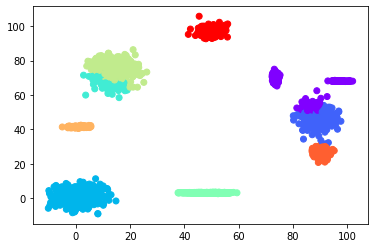

In [57]:
plt.scatter(cluster_data[:,0],cluster_data[:,1], c=labels, cmap='rainbow')

- Silhouette coefficient


In [23]:
res = []
for i in range (2,11):
  start_time = time.time()
  cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='single').fit(cluster_data)
  end_time = time.time()
  time_final  = end_time - start_time
  labels = cluster.labels_
  met = metrics.silhouette_score(cluster_data, labels, metric='euclidean')
  Dict = dict({'k': i, 'silhouette score': met, 'execution time': time_final})
  res.append(Dict)
print(*res, sep = "\n")

{'k': 2, 'silhouette score': 0.2765263608063444, 'execution time': 0.06023979187011719}
{'k': 3, 'silhouette score': 0.02996091241427347, 'execution time': 0.06116175651550293}
{'k': 4, 'silhouette score': 0.016609401001720574, 'execution time': 0.05915117263793945}
{'k': 5, 'silhouette score': -0.1565261364424422, 'execution time': 0.05716848373413086}
{'k': 6, 'silhouette score': -0.1591724305624011, 'execution time': 0.059651851654052734}
{'k': 7, 'silhouette score': -0.30097897652767724, 'execution time': 0.05729556083679199}
{'k': 8, 'silhouette score': -0.33549791126078365, 'execution time': 0.05754375457763672}
{'k': 9, 'silhouette score': -0.35314662907125594, 'execution time': 0.05725717544555664}
{'k': 10, 'silhouette score': -0.35732076727197376, 'execution time': 0.058390140533447266}


- Calinski-Harabasz Index


In [24]:
res = []
for i in range (2,11):
  start_time = time.time()
  cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='single').fit(cluster_data)
  end_time = time.time()
  time_final  = end_time - start_time
  labels = cluster.labels_
  met = metrics.calinski_harabasz_score(cluster_data, labels)
  Dict = dict({'k': i, 'Calinski Harabasz score': met, 'execution time': time_final})
  res.append(Dict)
print(*res, sep = "\n")

{'k': 2, 'Calinski Harabasz score': 3.8141824307357437, 'execution time': 0.058112382888793945}
{'k': 3, 'Calinski Harabasz score': 4.407917332935697, 'execution time': 0.05691647529602051}
{'k': 4, 'Calinski Harabasz score': 2.945492181587012, 'execution time': 0.05727696418762207}
{'k': 5, 'Calinski Harabasz score': 2.4894838631891707, 'execution time': 0.0574338436126709}
{'k': 6, 'Calinski Harabasz score': 2.520097342483128, 'execution time': 0.05757260322570801}
{'k': 7, 'Calinski Harabasz score': 2.111508951164628, 'execution time': 0.061126708984375}
{'k': 8, 'Calinski Harabasz score': 2.0780902038740123, 'execution time': 0.05691647529602051}
{'k': 9, 'Calinski Harabasz score': 2.432510656779936, 'execution time': 0.05862140655517578}
{'k': 10, 'Calinski Harabasz score': 2.437456356463215, 'execution time': 0.05848813056945801}


* Davies-Bouldin Index 

In [25]:
res = []
for i in range (2,11):
  start_time = time.time()
  cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='single').fit(cluster_data)
  end_time = time.time()
  time_final  = end_time - start_time
  labels = cluster.labels_
  met = davies_bouldin_score(cluster_data, labels)
  Dict = dict({'k': i, 'Davies Bouldin score': met, 'execution time': time_final})
  res.append(Dict)
print(*res, sep = "\n")

{'k': 2, 'Davies Bouldin score': 0.49409798410976974, 'execution time': 0.05995917320251465}
{'k': 3, 'Davies Bouldin score': 0.6174199326691526, 'execution time': 0.05736112594604492}
{'k': 4, 'Davies Bouldin score': 0.5881686708728915, 'execution time': 0.05727267265319824}
{'k': 5, 'Davies Bouldin score': 0.707701000126813, 'execution time': 0.06308984756469727}
{'k': 6, 'Davies Bouldin score': 0.6885090918257397, 'execution time': 0.059356689453125}
{'k': 7, 'Davies Bouldin score': 1.48445018084059, 'execution time': 0.05929112434387207}
{'k': 8, 'Davies Bouldin score': 1.3884381280734974, 'execution time': 0.05808210372924805}
{'k': 9, 'Davies Bouldin score': 1.3347761096126598, 'execution time': 0.05733990669250488}
{'k': 10, 'Davies Bouldin score': 1.263740296231992, 'execution time': 0.05741095542907715}


## 3.2 Limites de la méthode


Limites : 

1.   engytime
2.   disk-3000n



AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)


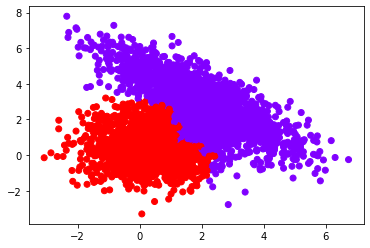

In [26]:
cluster_data=returnData(engytime)
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward').fit(cluster_data)
print(cluster)
labels = cluster.labels_
plt.scatter(cluster_data[:,0],cluster_data[:,1], c=labels, cmap='rainbow')

#4 Clustering DBSCAN



##4.1 Intérêts de la méthode

In [66]:
from sklearn.cluster import DBSCAN

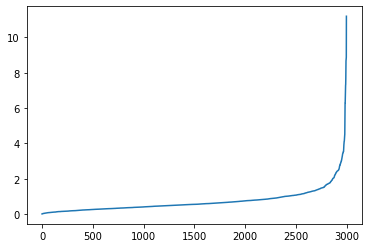

In [67]:
from sklearn.neighbors import NearestNeighbors
X=returnData(data)
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [69]:
res = []
range_eps = [0.1, 0.15, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75]
cluster_data=returnData(data)

for i in range_eps:
  start_time = time.time()
  dbData =DBSCAN(eps=i, min_samples=5).fit(cluster_data)
  end_time = time.time()
  time_final  = end_time - start_time
  labels = dbData.labels_
  met = metrics.silhouette_score(cluster_data, labels, metric='euclidean')
  Dict = dict({'eps': i, 'silhouette score': met, 'execution time': time_final})
  res.append(Dict)
print(*res, sep = "\n")

ValueError: ignored

DBSCAN(algorithm='auto', eps=0.6, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)


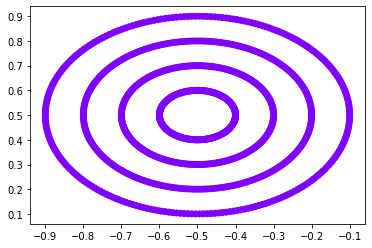

In [70]:
cluster_data=returnData(data3)
dbData =DBSCAN(eps=0.6, min_samples=5).fit(cluster_data)
print(dbData)
labels = dbData.labels_
plt.scatter(cluster_data[:,0],cluster_data[:,1], c=labels, cmap='rainbow')

#5 Clustering HDBSCAN


In [ ]:
pip install --upgrade git+https://github.com/scikit-learn-contrib/hdbscan.git#egg=hdbscan

In [ ]:
#Installation de HDBScan selon le lien git fournie

#pip install --upgrade git+https://github.com/scikit-learn-contrib/hdbscan.git#egg=hdbscan

In [ ]:
import hdbscan

from sklearn.neighbors import NearestNeighbors

X=returnData(data3)
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
cluster_data2=returnData(data2)
cluster = hdbscan.HDBSCAN(min_cluster_size=10).fit(cluster_data2)
print(cluster)
labels = cluster.labels_

In [ ]:
plt.scatter(cluster_data2[:,0],cluster_data2[:,1], c=labels, cmap='rainbow')

In [ ]:
res = []
range_eps = [0.1, 0.15, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75]
cluster_data=returnData(data3)
for i in range_eps:
  start_time = time.time()
  dbData =hdbscan.HDBSCAN(min_cluster_size=10).fit(cluster_data)
  end_time = time.time()
  time_final  = end_time - start_time
  labels = dbData.labels_
  met = metrics.silhouette_score(cluster_data, labels, metric='euclidean')
  Dict = dict({'eps': i, 'silhouette score': met, 'execution time': time_final})
  res.append(Dict)
print(*res, sep = "\n")

*Ajouter Davies-Bouldin et Calinski-Harabasz ?*


Reprenez les expérimentations effectuées avec DBSCAN. Comparez les résultats de ces deux méthodes.


Arrivez-vous à retrouver les qualités et les limites de ces deux méthodes sur les jeux de données sélectionnés ? Y-at-il des diférences de performances (en temps de calcul) ?



> Lien : https://www.overleaf.com/1276839189pybcnncxmrxw




#6 Synthèse


##6.1 Dataset de données générées aléatoirement

L'objectif est de réaliser une analyse expérimentale comparative de différentes méthodes de clustering

In [ ]:
import sklearn
import numpy
from sklearn import datasets
from pprint import pprint

In [ ]:
test= os.chdir("/content/gdrive/My Drive/5SDBD/clustering-benchmark-master/dataset")
!ls

In [ ]:
datax1= numpy.loadtxt('/content/gdrive/My Drive/5SDBD/clustering-benchmark-master/dataset/x1.txt')
datax2= numpy.loadtxt('/content/gdrive/My Drive/5SDBD/clustering-benchmark-master/dataset/x2.txt')
datax3= numpy.loadtxt('/content/gdrive/My Drive/5SDBD/clustering-benchmark-master/dataset/x3.txt')
datax4= numpy.loadtxt('/content/gdrive/My Drive/5SDBD/clustering-benchmark-master/dataset/x4.txt')
datay1= numpy.loadtxt('/content/gdrive/My Drive/5SDBD/clustering-benchmark-master/dataset/y1.txt')

In [ ]:
###############################################
#
# Merci de modifier uniquement ces 2 valeurs
#
###############################################

data= datay1
nk = 16    #Nombre cluster
print(data)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X=returnData(data)

plt.scatter(X[:,0],X[:,1])

plt.savefig('datay1.png')

###6.1.1 Clustering k-Means




In [ ]:
kmeans_data=returnData(data)
kmeans = KMeans(n_clusters=nk, random_state=0, init='k-means++').fit(kmeans_data)
print(kmeans)
labels = kmeans.labels_

In [ ]:
import matplotlib
matplotlib.axes.Axes.scatter
matplotlib.pyplot.scatter
matplotlib.axes.Axes.legend
matplotlib.pyplot.legend
matplotlib.collections.PathCollection.legend_elements
plt.scatter(kmeans_data[:,0],kmeans_data[:,1], c=labels, cmap='rainbow')
plt.savefig('datay1Kmeans16.png')

In [ ]:
res = []
plotkmeans = []
k = []
for i in range (nk-1,nk+1):
  start_time = time.time()
  kmeans = KMeans(n_clusters=i, random_state=0, init='k-means++').fit(kmeans_data)
  end_time = time.time()
  time_final  = end_time - start_time
  labels = kmeans.labels_
  met = metrics.silhouette_score(kmeans_data, labels, metric='euclidean')
  plotkmeans.append(met)
  Dict = dict({'k': i, 'silhouette score': met, 'execution time': time_final})
  k.append(i)
  res.append(Dict)
print(*res, sep = "\n")


In [ ]:
plt.plot(k, plotkmeans ,label="Silhouette")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.grid()
plt.savefig('datay1KmeansSilhouette.png')

In [ ]:
res = []
plotkmeansCH = []
k = []
for i in range (nk-7,nk+7):
  start_time = time.time()
  kmeans = KMeans(n_clusters=i, random_state=0, init='k-means++').fit(kmeans_data)
  end_time = time.time()
  time_final  = end_time - start_time
  labels = kmeans.labels_
  met = metrics.calinski_harabasz_score(kmeans_data, labels)
  plotkmeansCH.append(met)
  k.append(i)
  Dict = dict({'k': i, 'Calinski Harabasz score': met, 'execution time': time_final})
  res.append(Dict)
print(*res, sep = "\n")

In [ ]:
plt.plot(k, plotkmeansCH ,label="Calinski Harabasz")
plt.xlabel("Number of clusters")
plt.ylabel("Calinski Harabasz score")
plt.grid()
plt.savefig('datay1KmeansCalinskiHarabasz.png')

In [ ]:
res = []
plotkmeansDB = []
k = []
for i in range (nk-7,nk+7):
  start_time = time.time()
  kmeans = KMeans(n_clusters=i, random_state=0, init='k-means++').fit(kmeans_data)
  end_time = time.time()
  time_final  = end_time - start_time
  labels = kmeans.labels_
  met = davies_bouldin_score(kmeans_data, labels)
  plotkmeansDB.append(met)
  k.append(i)
  Dict = dict({'k': i, 'Davies Bouldin score': met, 'execution time': time_final})
  res.append(Dict)
print(*res, sep = "\n")


In [ ]:
plt.plot(k, plotkmeansDB ,label="Davies Bouldin")
plt.xlabel("Number of clusters")
plt.ylabel("Davies Bouldin score")
plt.grid()
plt.savefig('datay1KmeansDaviesBouldin.png')

###6.1.2 Clustering agglomératif



In [ ]:
cluster_data=returnData(data)
cluster = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='single').fit(cluster_data)
print(cluster)
labels = cluster.labels_

In [ ]:
plt.scatter(cluster_data[:,0],cluster_data[:,1], c=labels, cmap='rainbow')
plt.savefig('datax1agglomerativeSingle9.png')

In [ ]:
res = []
plotagglo = []
k = []
for i in range (nk-7,nk+7):
  start_time = time.time()
  cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='complete').fit(cluster_data)
  end_time = time.time()
  time_final  = end_time - start_time
  labels = cluster.labels_
  met = metrics.silhouette_score(cluster_data, labels, metric='euclidean')
  plotagglo.append(met)
  k.append(i)
  Dict = dict({'k': i, 'silhouette score': met, 'execution time': time_final})
  res.append(Dict)
print(*res, sep = "\n")

In [ ]:
plt.plot(k, plotagglo ,label="Silhouette")
plt.xlabel("Silhouette score")
plt.ylabel("Number of clusters")
plt.grid()
plt.savefig('datax1AggloCompleteSilhouette.png')

In [ ]:
res = []
plotagglo = []
k = []
for i in range (nk-7,nk+7):
  start_time = time.time()
  cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='complete').fit(cluster_data)
  end_time = time.time()
  time_final  = end_time - start_time
  labels = cluster.labels_
  met = metrics.calinski_harabasz_score(cluster_data, labels)
  plotagglo.append(met)
  k.append(i)
  Dict = dict({'k': i, 'Calinski Harabasz score': met, 'execution time': time_final})
  res.append(Dict)
print(*res, sep = "\n")

In [ ]:
plt.plot(k, plotagglo ,label="Calinski Harabasz")
plt.xlabel("Calinski Harabasz score")
plt.ylabel("Number of clusters")
plt.grid()
plt.savefig('datax1AggloCompleteCalinskiHarabasz.png')

In [ ]:
res = []
plotagglo = []
k = []
for i in range (nk-7,nk+7):
  start_time = time.time()
  cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='complete').fit(cluster_data)
  end_time = time.time()
  time_final  = end_time - start_time
  labels = cluster.labels_
  met = davies_bouldin_score(cluster_data, labels)
  plotagglo.append(met)
  k.append(i)
  Dict = dict({'k': i, 'Davies Bouldin score': met, 'execution time': time_final})
  res.append(Dict)
print(*res, sep = "\n")

In [ ]:
plt.plot(k, plotagglo ,label="Davies Bouldin")
plt.xlabel("Davies Bouldin score")
plt.ylabel("Number of clusters")
plt.grid()
plt.savefig('datax1AggloCompleteDaviesBouldin.png')

###6.1.3 Clustering DBSCAN

In [ ]:
from sklearn.neighbors import NearestNeighbors

X=returnData(data)
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.ylim(top=15000) 
plt.plot(distances)

In [ ]:
res = []

range_eps = [2000, 3000,  4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 20000, 22000, 24000, 26000, 28000, 30000, 50000]
ploteps = []
k = []
cluster_data=returnData(data)
for i in range_eps:
  start_time = time.time()
  dbData =DBSCAN(eps=i, min_samples=5).fit(cluster_data)
  end_time = time.time()
  time_final  = end_time - start_time
  labels = dbData.labels_
  met = metrics.silhouette_score(cluster_data, labels, metric='euclidean')
  ploteps.append(met)
  k.append(i)
  Dict = dict({'eps': i, 'silhouette score': met, 'execution time': time_final})
  res.append(Dict)
print(*res, sep = "\n")

In [ ]:
plt.plot(k, ploteps ,label="Silhouette to choose eps")
plt.xlabel("Eps value")
plt.ylabel("Silhouette score")
plt.grid()
plt.savefig('datax1dbScanSilhouette.png')

In [ ]:
cluster_data=returnData(data)
dbData =DBSCAN(eps=20000, min_samples=5).fit(cluster_data)
print(dbData)
labels = dbData.labels_

In [ ]:
plt.scatter(cluster_data[:,0],cluster_data[:,1], c=labels, cmap='rainbow')
plt.savefig('datax1dbScaneps20000.png')

###6.1.4 Clustering HDBSCAN

In [ ]:
import hdbscan

In [ ]:
cluster_data2=returnData(data)
cluster = hdbscan.HDBSCAN(min_cluster_size=10).fit(cluster_data2)
print(cluster)
labels = cluster.labels_

In [ ]:
plt.scatter(cluster_data2[:,0],cluster_data2[:,1], c=labels, cmap='rainbow')
plt.savefig('datax1hdbScaneps.png')

##6.2 Dataset iris ou balance-scale (dimension 4)

L'objectif est de réaliser une analyse expérimentale comparative de différentes méthodes de clustering